# 0. 导入openDigger
- 基于给出的镜像数据和 OpenDigger，完成项目 2015年/创建 - 归档期间的以下数据分析任务
- 项目：dotnet/roslyn

In [1]:
var openDigger = require('../src/open_digger');

In [2]:
var query = openDigger.driver.clickhouse.query;

# 1. 数据分析
1. 每月新增 Star 和 Frok 的个数
2. 每月打开 Issue 和 关闭 Issue 的个数
3. 每月打开 PR 和合入 PR 的个数(注意，关闭 PR 不等于合入)
4. 每月在仓库中活跃(只要有日志产生就算)的不同开发者总数
5. Issue 从打开到关闭的平均时⻓和中位数(单位:天)
6. PR 从打开到合入的平均时⻓和中位数(单位:天)
7. Issue和PR从打开到第一次有人回复(非本人回复)的平均时⻓和中位数(单位:天) 

## 1.1 每月新增Star个数

┌─────────┬───────────┬────────────────┐
│ (index) │   Date    │ 每月新增Star数 │
├─────────┼───────────┼────────────────┤
│    0    │ '2015-01' │     '886'      │
│    1    │ '2015-02' │     '488'      │
│    2    │ '2015-03' │     '324'      │
│    3    │ '2015-04' │     '468'      │
│    4    │ '2015-05' │     '335'      │
│    5    │ '2015-06' │     '194'      │
│    6    │ '2015-07' │     '339'      │
│    7    │ '2015-08' │     '252'      │
│    8    │ '2015-09' │     '288'      │
│    9    │ '2015-10' │     '271'      │
│   10    │ '2015-11' │     '240'      │
│   11    │ '2015-12' │     '309'      │
│   12    │ '2016-01' │     '240'      │
│   13    │ '2016-02' │     '197'      │
│   14    │ '2016-03' │     '247'      │
│   15    │ '2016-04' │     '313'      │
│   16    │ '2016-05' │     '253'      │
│   17    │ '2016-06' │     '483'      │
│   18    │ '2016-07' │     '251'      │
│   19    │ '2016-08' │     '237'      │
│   20    │ '2016-09' │     '181'      │
│   21    │ '2016-10'

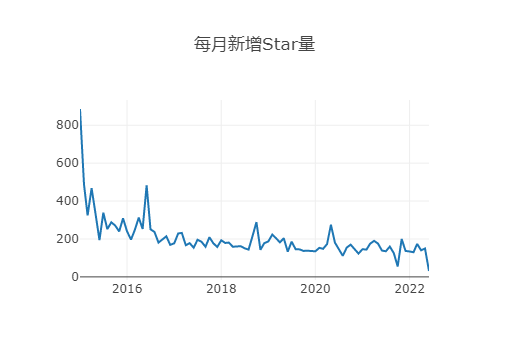

In [8]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 29078997;
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `
        SELECT  count(*) stars,  formatDateTime(created_at,'%Y-%m') as time FROM 
        github_log.events
        WHERE repo_id = ${project_id} 
        And toYear(created_at) = ${ant}  
        AND type = 'WatchEvent'
        group by formatDateTime(created_at,'%Y-%m')
        order by formatDateTime(created_at,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].stars);
      time_show.push(data[i][j].time);
     };
    };
   var table_data = [];
    for (var t = 0;t<stars.length;t++){
        table_data.push({'Date':time_show[t],'每月新增Star数':stars[t]});
    }
    console.table(table_data);
    console.log("以上为有新增star的数据");
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月新增Star量"});
})

## 1.2 每月新增Fork个数

┌─────────┬───────────┬────────────────┐
│ (index) │   Date    │ 每月新增Fork数 │
├─────────┼───────────┼────────────────┤
│    0    │ '2015-01' │     '131'      │
│    1    │ '2015-02' │     '159'      │
│    2    │ '2015-03' │     '109'      │
│    3    │ '2015-04' │     '113'      │
│    4    │ '2015-05' │      '91'      │
│    5    │ '2015-06' │      '65'      │
│    6    │ '2015-07' │      '97'      │
│    7    │ '2015-08' │      '97'      │
│    8    │ '2015-09' │      '87'      │
│    9    │ '2015-10' │      '78'      │
│   10    │ '2015-11' │      '89'      │
│   11    │ '2015-12' │     '108'      │
│   12    │ '2016-01' │      '74'      │
│   13    │ '2016-02' │     '101'      │
│   14    │ '2016-03' │      '80'      │
│   15    │ '2016-04' │      '89'      │
│   16    │ '2016-05' │      '71'      │
│   17    │ '2016-06' │      '82'      │
│   18    │ '2016-07' │      '72'      │
│   19    │ '2016-08' │      '73'      │
│   20    │ '2016-09' │      '56'      │
│   21    │ '2016-10'

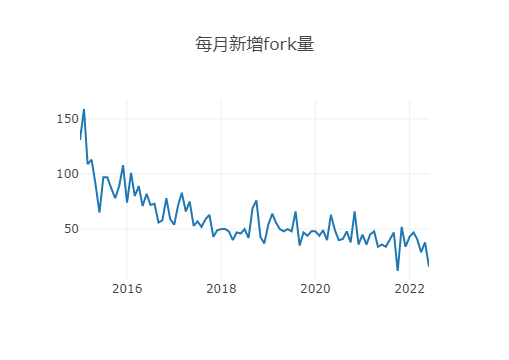

In [9]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 29078997;
Promise.all(years.map(ant =>{
     var s = `select count(*) as forks, 
    formatDateTime(created_at,'%Y-%m') as time
    from github_log.events 
    where repo_id=${project_id} 
    and toYear(created_at) = ${ant} 
    and type = 'ForkEvent' 
    group by formatDateTime(created_at,'%Y-%m')
    order by formatDateTime(created_at,'%Y-%m')`;
    return query(s);
})).then(data =>{
    // 格式化存储数据
    var stars = [];
    var time_show = [];
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].forks);
      time_show.push(data[i][j].time);
     };
    };
    var table_data = [];
    for (var t = 0;t<stars.length;t++){
        table_data.push({'Date':time_show[t],'每月新增Fork数':stars[t]});
    }
    console.table(table_data);
    console.log("以上为有新增fork的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月新增fork量"});
})

## 1.2 每月打开Issue个数

┌─────────┬───────────┬─────────────────┐
│ (index) │   Date    │ 每月打开Issue数 │
├─────────┼───────────┼─────────────────┤
│    0    │ '2015-01' │      '174'      │
│    1    │ '2015-02' │      '476'      │
│    2    │ '2015-03' │      '383'      │
│    3    │ '2015-04' │      '328'      │
│    4    │ '2015-05' │      '379'      │
│    5    │ '2015-06' │      '305'      │
│    6    │ '2015-07' │      '304'      │
│    7    │ '2015-08' │      '360'      │
│    8    │ '2015-09' │      '385'      │
│    9    │ '2015-10' │      '449'      │
│   10    │ '2015-11' │      '391'      │
│   11    │ '2015-12' │      '338'      │
│   12    │ '2016-01' │      '328'      │
│   13    │ '2016-02' │      '687'      │
│   14    │ '2016-03' │      '493'      │
│   15    │ '2016-04' │      '410'      │
│   16    │ '2016-05' │      '392'      │
│   17    │ '2016-06' │      '301'      │
│   18    │ '2016-07' │      '272'      │
│   19    │ '2016-08' │      '334'      │
│   20    │ '2016-09' │      '401'     

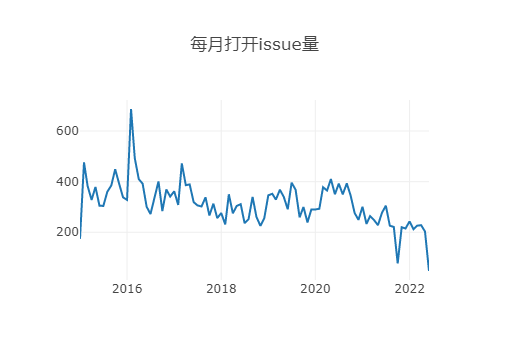

In [10]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 29078997;
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select count(*) as open_num, 
    formatDateTime(created_at,'%Y-%m') as time
    from github_log.events 
    where repo_id=${project_id}
    and toYear(created_at) = ${ant}
    and type = 'IssuesEvent' 
    and action = 'opened'
    group by formatDateTime(created_at,'%Y-%m')
    order by formatDateTime(created_at,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
      var stars = [];
    var time_show = [];
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].open_num);
      time_show.push(data[i][j].time);
     };
    };
    var table_data = [];
    for (var t = 0;t<stars.length;t++){
        table_data.push({'Date':time_show[t],'每月打开Issue数':stars[t]});
    }
    console.table(table_data);
    console.log("以上为有打开issue的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月打开issue量"});
})

## 2.2 每月关闭Issue个数

┌─────────┬───────────┬─────────────────┐
│ (index) │   Date    │ 每月关闭Issue数 │
├─────────┼───────────┼─────────────────┤
│    0    │ '2015-01' │      '29'       │
│    1    │ '2015-02' │      '184'      │
│    2    │ '2015-03' │      '241'      │
│    3    │ '2015-04' │      '264'      │
│    4    │ '2015-05' │      '266'      │
│    5    │ '2015-06' │      '155'      │
│    6    │ '2015-07' │      '124'      │
│    7    │ '2015-08' │      '227'      │
│    8    │ '2015-09' │      '309'      │
│    9    │ '2015-10' │      '405'      │
│   10    │ '2015-11' │      '269'      │
│   11    │ '2015-12' │      '242'      │
│   12    │ '2016-01' │      '212'      │
│   13    │ '2016-02' │      '305'      │
│   14    │ '2016-03' │      '338'      │
│   15    │ '2016-04' │      '225'      │
│   16    │ '2016-05' │      '317'      │
│   17    │ '2016-06' │      '193'      │
│   18    │ '2016-07' │      '168'      │
│   19    │ '2016-08' │      '285'      │
│   20    │ '2016-09' │      '286'     

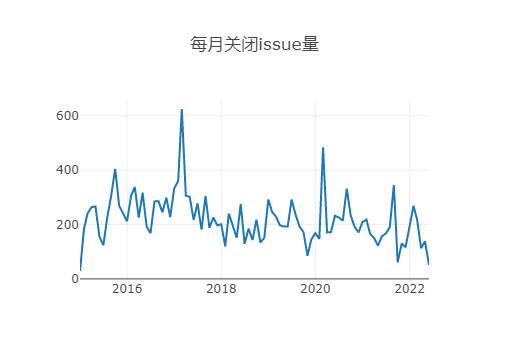

In [11]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 29078997;
Promise.all(years.map(ant =>{
     var s = `select count(*) as close_num, 
    formatDateTime(created_at,'%Y-%m') as time
    from github_log.events 
    where repo_id=${project_id} 
    and toYear(created_at) = ${ant}
    and type = 'IssuesEvent' 
    and action = 'closed'
    group by formatDateTime(created_at,'%Y-%m')
    order by formatDateTime(created_at,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].close_num);
      time_show.push(data[i][j].time);
     };
    };
     var table_data = [];
    for (var t = 0;t<stars.length;t++){
        table_data.push({'Date':time_show[t],'每月关闭Issue数':stars[t]});
    }
    console.table(table_data);
    console.log("以上为有关闭issue的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月关闭issue量"});
})

## 3.1 每月打开PR次数

┌─────────┬───────────┬──────────────┐
│ (index) │   Date    │ 每月打开PR数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-01' │     '16'     │
│    1    │ '2015-02' │    '282'     │
│    2    │ '2015-03' │    '380'     │
│    3    │ '2015-04' │    '373'     │
│    4    │ '2015-05' │    '408'     │
│    5    │ '2015-06' │    '252'     │
│    6    │ '2015-07' │    '207'     │
│    7    │ '2015-08' │    '271'     │
│    8    │ '2015-09' │    '306'     │
│    9    │ '2015-10' │    '444'     │
│   10    │ '2015-11' │    '241'     │
│   11    │ '2015-12' │    '277'     │
│   12    │ '2016-01' │    '196'     │
│   13    │ '2016-02' │    '359'     │
│   14    │ '2016-03' │    '421'     │
│   15    │ '2016-04' │    '351'     │
│   16    │ '2016-05' │    '283'     │
│   17    │ '2016-06' │    '323'     │
│   18    │ '2016-07' │    '257'     │
│   19    │ '2016-08' │    '330'     │
│   20    │ '2016-09' │    '301'     │
│   21    │ '2016-10' │    '337'     │
│   22    │ '2016-11' │    '40

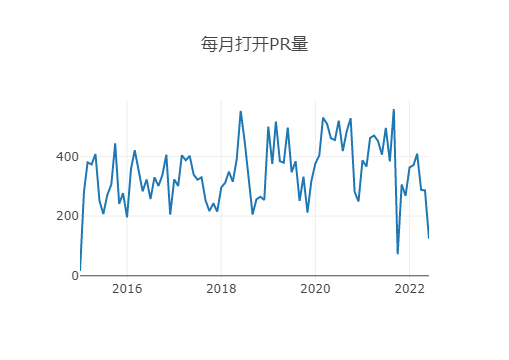

In [12]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 29078997;
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select count(*) as open_pr_num, 
    formatDateTime(created_at,'%Y-%m') as time
    from github_log.events 
    where repo_id=${project_id}
    and toYear(created_at) = ${ant}
    and type = 'PullRequestEvent' 
    and action = 'opened'
    group by formatDateTime(created_at,'%Y-%m')
    order by formatDateTime(created_at,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].open_pr_num);
      time_show.push(data[i][j].time);
     };
    };
      var table_data = [];
    for (var t = 0;t<stars.length;t++){
        table_data.push({'Date':time_show[t],'每月打开PR数':stars[t]});
    }
    console.table(table_data);
    console.log("以上为有打开PR的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月打开PR量"});
})

## 3.2 每月合入PR个数

┌─────────┬───────────┬──────────────┐
│ (index) │   Date    │ 每月合入PR数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-01' │     '5'      │
│    1    │ '2015-02' │    '216'     │
│    2    │ '2015-03' │    '319'     │
│    3    │ '2015-04' │    '325'     │
│    4    │ '2015-05' │    '358'     │
│    5    │ '2015-06' │    '211'     │
│    6    │ '2015-07' │    '171'     │
│    7    │ '2015-08' │    '217'     │
│    8    │ '2015-09' │    '280'     │
│    9    │ '2015-10' │    '364'     │
│   10    │ '2015-11' │    '188'     │
│   11    │ '2015-12' │    '223'     │
│   12    │ '2016-01' │    '148'     │
│   13    │ '2016-02' │    '293'     │
│   14    │ '2016-03' │    '333'     │
│   15    │ '2016-04' │    '280'     │
│   16    │ '2016-05' │    '216'     │
│   17    │ '2016-06' │    '264'     │
│   18    │ '2016-07' │    '204'     │
│   19    │ '2016-08' │    '251'     │
│   20    │ '2016-09' │    '274'     │
│   21    │ '2016-10' │    '296'     │
│   22    │ '2016-11' │    '33

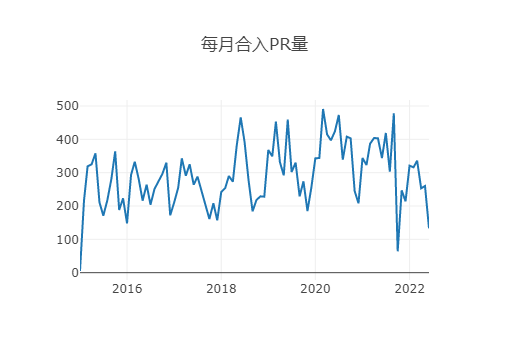

In [14]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 29078997;
Promise.all(years.map(ant =>{
     var s = `select count(*) as merge_pr_num, 
    formatDateTime(created_at,'%Y-%m') as time
    from github_log.events 
    where repo_id=${project_id}
    and toYear(created_at) = ${ant}
    and type = 'PullRequestEvent' 
    and pull_merged=1
    group by formatDateTime(created_at,'%Y-%m')
    order by formatDateTime(created_at,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].merge_pr_num);
      time_show.push(data[i][j].time);
     };
    };
      var table_data = [];
    for (var t = 0;t<stars.length;t++){
        table_data.push({'Date':time_show[t],'每月合入PR数':stars[t]});
    }
    console.table(table_data);
    console.log("以上为有合入PR的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月合入PR量"});
})

## 4. 每月在仓库中活跃(只要有日志产生就算)的不同开发者总数

In [15]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
var res_active= []
var project_id = 29078997;
for (var y=0;y<years.length;y++)
{
    var year = years[y];
    query(    
        `SELECT 
        formatDateTime(created_at, '%Y-%m') as Time,
        count(*) as Amount
        FROM github_log.events
        where repo_id = ${project_id}
        And toYear(created_at) = ${year}
        group by formatDateTime(created_at, '%Y-%m')
        order by formatDateTime(created_at, '%Y-%m')`).then(res=>{
        if (res.length!=0){
        res_active = res_active.concat(res);}
    });
}

┌─────────┬───────────┬────────────────┐
│ (index) │   Date    │ 不同开发者总数 │
├─────────┼───────────┼────────────────┤
│    0    │ '2015-01' │     '2405'     │
│    1    │ '2015-02' │     '6119'     │
│    2    │ '2015-03' │     '6941'     │
│    3    │ '2015-04' │     '6219'     │
│    4    │ '2015-05' │     '6594'     │
│    5    │ '2015-06' │     '4684'     │
│    6    │ '2015-07' │     '3708'     │
│    7    │ '2015-08' │     '5170'     │
│    8    │ '2015-09' │     '6596'     │
│    9    │ '2015-10' │     '9532'     │
│   10    │ '2015-11' │     '6167'     │
│   11    │ '2015-12' │     '6448'     │
│   12    │ '2016-01' │     '5949'     │
│   13    │ '2016-02' │     '9086'     │
│   14    │ '2016-03' │     '9067'     │
│   15    │ '2016-04' │     '7617'     │
│   16    │ '2016-05' │     '7378'     │
│   17    │ '2016-06' │     '7515'     │
│   18    │ '2016-07' │     '6195'     │
│   19    │ '2016-08' │     '8036'     │
│   20    │ '2016-09' │     '7339'     │
│   21    │ '2016-10' │

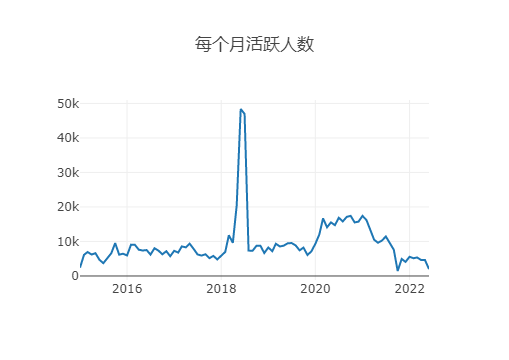

In [16]:
// 绘图
for(let i = 0; i < res_active.length-1; i++){
    for(let j = 0; j <res_active.length-1; j++){
        var d1 = new Date(res_active[j]['Time']);
        var d2 = new Date(res_active[j+1]['Time']);
        if(d1>d2){
            var current = res_active[j]
            res_active[j] = res_active[j+1]
            res_active[j+1] = current
        }
    }
}

var x_axis = []
var y_axis = []
for (var y_index=0 ;y_index<res_active.length;y_index++){
        x_axis.push(res_active[y_index]['Time']);
        y_axis.push(res_active[y_index]['Amount']);
        
    }


var table_data = [];
for (var t = 0;t<x_axis.length;t++){
    table_data.push({'Date':x_axis[t],'不同开发者总数':y_axis[t]});
}
console.table(table_data);

openDigger.render.plotly([
     {x: x_axis, y: y_axis}
    ], {title: `每个月活跃人数`});  

## 5. Issue 从打开到关闭的平均时⻓和中位数(单位:天)

In [17]:
years = [2015,2016,2017,2018,2019,2020,2021,2022];
months = [1,2,3,4,5,6,7,8,9,10,11,12];
var project_id = 29078997;
var res_minus= [];
for (var y=0;y<years.length;y++)
{
    var year = years[y];
query(    
        `SELECT ${year} as year , avg(minus) as average, quantile(0.5)(minus) as mid FROM (
            SELECT dateDiff('minute', issue_created_at, issue_closed_at) as minus
            FROM github_log.events 
            where repo_id = ${project_id} and 
            toYear(created_at) = ${year} and
            type = 'IssuesEvent' and
            minus > 0)
            `).then(res=>{
        if (res.length!=0){
        res_minus = res_minus.concat(res);}
    });
}

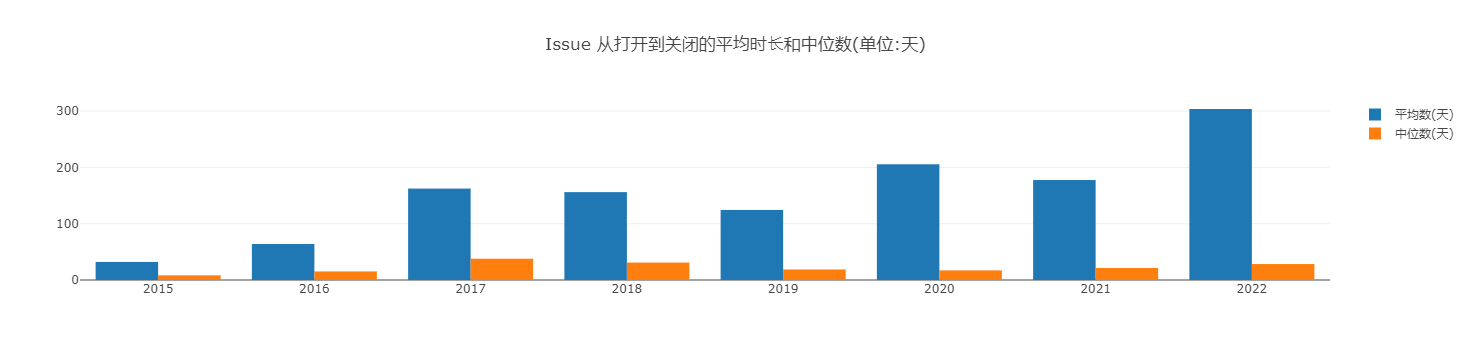

In [18]:
var x_axis_issue = []
var y_axis_issue_average = []
var y_axis_issue_mid = []
for(let i = 0; i < res_minus.length-1; i++){
    for(let j = 0; j <res_minus.length-1; j++){
        if(res_minus[j]['year'] > res_minus[j+1]['year']){
            var current = res_minus[j]
            res_minus[j] = res_minus[j+1]
            res_minus[j+1] = current
        }
    }
}
for (var i=0;i<res_minus.length;i++){
    if(res_minus[i]['average']!=null){
        x_axis_issue.push(res_minus[i]['year']);
        y_axis_issue_average.push(res_minus[i]['average']/(60*24));
        y_axis_issue_mid.push(res_minus[i]['mid']/(60*24));
    }
}
openDigger.render.plotly([
        {x: x_axis_issue, y:  y_axis_issue_average, type: 'bar',name:'平均数(天)'},
    {x: x_axis_issue, y:  y_axis_issue_mid, type: 'bar',name:'中位数(天)'}
    ], {
        title: 'Issue 从打开到关闭的平均时⻓和中位数(单位:天)',
    })

## 6. PR 从打开到关闭的平均时⻓和中位数(单位:天)

In [19]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
var res_pr_merger= []
var project_id = 29078997;
for (var y=0;y<years.length;y++)
{
    var year = years[y];
query(    
        `SELECT ${year} as year , avg(minus) as average, quantile(0.5)(minus) as mid FROM (
            SELECT dateDiff('second', issue_created_at, pull_merged_at) as minus
            FROM github_log.events
            WHERE
            repo_id = ${project_id} and
            toYear(created_at) = ${year} and
            pull_merged == 1 and
            minus > 0)
            `).then(res=>{
        if (res.length!=0){
        res_pr_merger = res_pr_merger.concat(res);}
    });
}

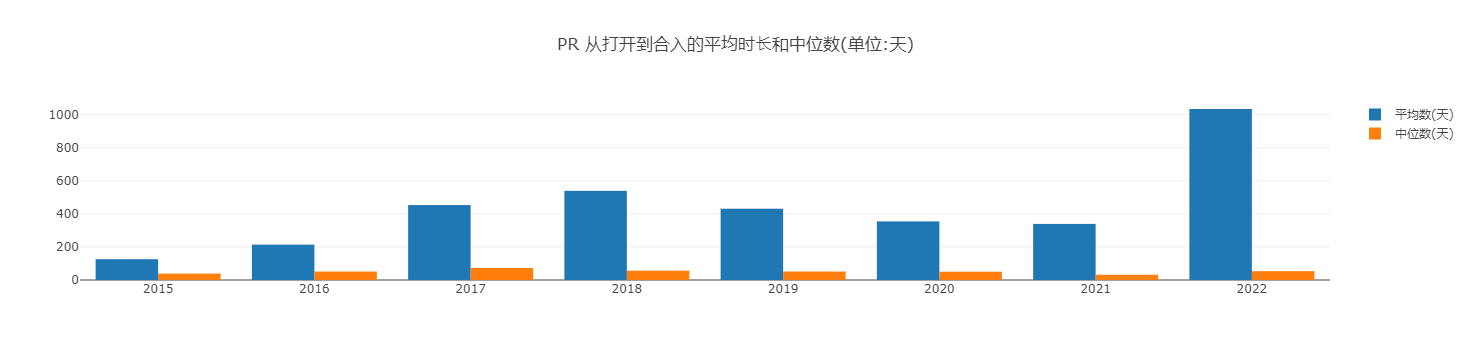

In [20]:
var x_axis_pr_merge = []
var y_axis_pr_merge_average = []
var y_axis_pr_merge_mid = []
for(let i = 0; i < res_pr_merger.length-1; i++){
    for(let j = 0; j <res_pr_merger.length-1; j++){
        if(res_pr_merger[j]['year'] > res_pr_merger[j+1]['year']){
            var current = res_pr_merger[j]
            res_pr_merger[j] = res_pr_merger[j+1]
            res_pr_merger[j+1] = current
        }
    }
}
for (var i=0;i<res_pr_merger.length;i++){
    if(res_pr_merger[i]['average']!=null){
        x_axis_pr_merge.push(res_pr_merger[i]['year']);
        y_axis_pr_merge_average.push(res_pr_merger[i]['average']/(60*24));
        y_axis_pr_merge_mid.push(res_pr_merger[i]['mid']/(60*24));
    }
}
openDigger.render.plotly([
        {x: x_axis_pr_merge, y:  y_axis_pr_merge_average, type: 'bar',name:'平均数(天)'},
    {x: x_axis_pr_merge, y:  y_axis_pr_merge_mid, type: 'bar',name:'中位数(天)'}
    ], {
        title: 'PR 从打开到合入的平均时⻓和中位数(单位:天)',
    })

## 7. Issue和PR从打开到第一次有人回复(非本人回复)的平均时⻓和中位数(单位:天)

In [21]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
var res_issue_pr= []
var project_id = 29078997;
for (var y=0;y<years.length;y++)
{
    var year = years[y];
query(    
        `SELECT ${year} as year , avg(minus) as average, quantile(0.5)(minus) as mid FROM (
            SELECT 
            dateDiff('second',  issue_created_at, issue_comment_created_at) as minus,
            issue_id, 
            issue_created_at, 
            issue_comment_created_at 
            FROM github_log.events
            WHERE repo_id = ${project_id} AND
             toYear(created_at) = ${year} AND
            issue_id<>0 AND 
            issue_comment_author_id<>0 AND 
            issue_comment_author_id<>issue_author_id)
            `).then(res=>{
        if (res.length!=0){
        res_issue_pr = res_issue_pr.concat(res);}
    });
}

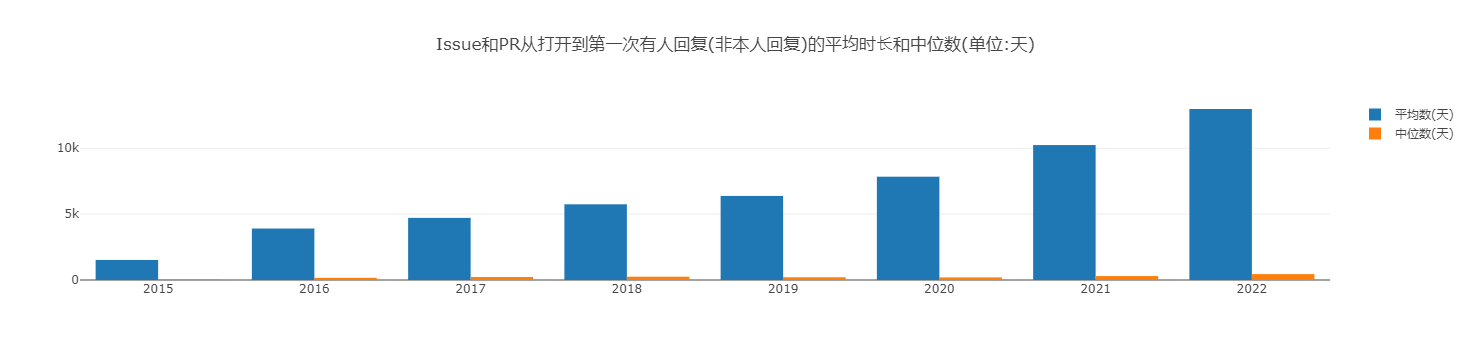

In [22]:
var x_axis_issue_pr = []
var y_axis_issue_pr_average = []
var y_axis_issue_pr_mid = []
for(let i = 0; i < res_issue_pr.length-1; i++){
    for(let j = 0; j <res_issue_pr.length-1; j++){
        if(res_issue_pr[j]['year'] > res_issue_pr[j+1]['year']){
            var current = res_issue_pr[j]
            res_issue_pr[j] = res_issue_pr[j+1]
            res_issue_pr[j+1] = current
        }
    }
}
for (var i=0;i<res_issue_pr.length;i++){
    if(res_issue_pr[i]['average']!=null){
        x_axis_issue_pr.push(res_issue_pr[i]['year']);
        y_axis_issue_pr_average.push(res_issue_pr[i]['average']/(60*24));
        y_axis_issue_pr_mid.push(res_issue_pr[i]['mid']/(60*24));
    }
}
openDigger.render.plotly([
        {x: x_axis_issue_pr, y:  y_axis_issue_pr_average, type: 'bar',name:'平均数(天)'},
    {x: x_axis_issue_pr, y:  y_axis_issue_pr_mid, type: 'bar',name:'中位数(天)'}
    ], {
        title: 'Issue和PR从打开到第一次有人回复(非本人回复)的平均时⻓和中位数(单位:天)',
    })